# 신경망 제작

## 신경망 구조

신경망(Neural network)은 신경의 시냅스와 뉴런을 모형으로 한 수학적 모형입니다.

신경망은 총 세 개의 층(layer)을 갖고 있고, 각 층은 뉴런의 집합(또는 배열)으로 이루어져 있습니다.

전체적인 신경망의 구조는 아래와 같습니다.

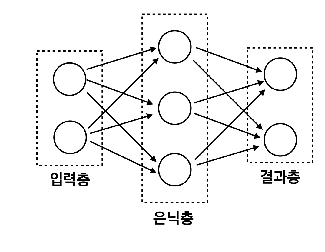

In [6]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

img = imread('./pic/pic_neural_network.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

### 1. 입력층 (input layer)

입력층은 입력뉴런(input neuron)의 집합입니다. 

입력 뉴런을 통해 신경망 모형을 학습시키거나 결과를 추출합니다.

입력 뉴런을 통해 들어온 신호를 $x_1,\cdots, x_n$라 합시다.

이 신호의 배열 ```X```를 입력층이라 해도 무방합니다.

$$X = \begin{bmatrix} x_1 & \cdots & x_n \end{bmatrix}$$

### 2. 은닉층 (hidden layer)

은닉층은 입력 뉴런을 통해 들어온 신호를 처리하여 얻은 값을 저장하는 중간 뉴런으로 이루어져 있습니다.

은닉층의 $j$번째 뉴런의 값 $y_j$는 다음과 같이 계산됩니다.

$$y_j = x_1W_{1j} + \cdots x_nW_{nj} + b_{j}$$

여기서 $B = \begin{bmatrix} b_1 & \cdots & b_m \end{bmatrix}$는 편향값입니다.

행렬 $W$을 다음과 같이 정의합시다.

$$W = \begin{bmatrix} W_{11} & \cdots & W_{1m} \\
\vdots & \ddots & \vdots \\
W_{n1} & \cdots & W_{nm} \end{bmatrix}$$

배열 $Y = \begin{bmatrix} y_1 & \cdots y_m \end{bmatrix}$은 다음 행렬곱으로 계산됩니다.

$$Y = XW+B$$

참고로 은닉층은 여러개 일 수도 있습니다.

하나의 은닉층 $Y^{(s)}$에서 다음 은닉층 $Y^{(s+1)}$으로 신호를 전달할 때에도 위와 비스산 가중치와 편향을 적용합니다.

$$Y^{(s+1)} = Y^{(s)}W^{(s)}+B^{(s)}$$

참고로 은닉층의 뉴런을 활성화 함수로 전달하여 다음 은닉층으로 넘길 수도 있습니다.

$$Y' = h(Y)$$

활성화 함수에는 이전에 다루었던 계단함수, 시그모이드, ReLU 함수 등을 사용할 수 있습니다.

### 3. 출력층

출력층을 구현하는 것은 은닉층과 유사합니다.

다만 결과물을 분류(classification)할 것이냐 회귀(regression)할 것이냐에 따라 활성화 함수의 사용이 달라집니다.

일반적으로 분류에는 소프트맥스(softmax) 함수를, 회귀에는 항등함수를 사용합니다.

In [30]:
import numpy as np

# 항등 함수를 정의
def ident(x):
    return x 

# 소프트맥스 함수를 정의
def softmax(x):
    ex = np.exp(x)
    return ex / np.sum(ex)

print(softmax([1,2,3,4,5]))

[0.01165623 0.03168492 0.08612854 0.23412166 0.63640865]


참고로 소프트맥스 함수는 지수연산을 요구합니다.

따라서 입력 배열의 값이 조금이라도 커지면 계산에 오버플로우(overflow, 변수에 할당된 메모리 범위를 넘어서 실제값과 달라지는 경우)가 생길 수 있습니다. 

따라서 아래와 같이 배열의 최댓값이 $1$이 되도록 보정해주는 것이 좋습니다. 

In [31]:
def softmax(x):
    m = np.max(x)
    ex = np.exp(x-m)
    return ex / np.sum(ex)

print(softmax([1,2,3,5,10]))

[1.22417160e-04 3.32764341e-04 9.04547262e-04 6.68375046e-03
 9.91956521e-01]


# 신경망의 구현

지금까지 정리한 것을 그림으로 나타내면 다음과 같습니다.

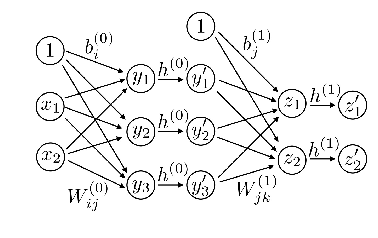

In [16]:
img = imread('./pic/pic_neural_network_with_var.jpg')
plt.imshow(img)
plt.axis('off')
plt.show()

이를 토대로 간단한 신경망 모형을 구축해 봅시다.

은닉층의 활성화 함수는 시그모이드 함수로, 출력층의 활성화 함수는 항등 함수라 가정합니다.

가중치 행렬을 아래와 같이 정의합니다.

$$W^{(0)} = \begin{bmatrix} 0.1 & 0.3 & 0.5 \\
    0.2 & 0.4 & 0.6 \end{bmatrix}, W^{(1)} = \begin{bmatrix} 0.1 & 0.2 \\
    0.3 & 0.6 \\
    0.1 & 0.5 \end{bmatrix}$$
    
편향 배열은 아래와 같이 정의합시다.

$$B^{(0)} = \begin{bmatrix} 0.5 & 0.2 & 0.1 \end{bmatrix},B^{(1)} =\begin{bmatrix} 0.2 & 0.3 \end{bmatrix}$$

In [32]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def init_network(): # 뉴럴네트워크를 생성합니다. 가중치와 편향을 정의합니다.
    network = {}
    network['W0'] = np.array([[.1,.3,.5],[.2,.4,.6]])
    network['W1'] = np.array([[.1,.2],[.3,.6],[.1,.5]])
    network['B0'] = np.array([.5,.2,.1])
    network['B1'] = np.array([.2,.3])
    
    return network

def forward(network, X): # 입력값 x를 뉴럴네트워크에 대입하여 결과를 출력합니다.
    W0, W1 = network['W0'], network['W1']
    B0, B1 = network['B0'], network['B1']
    
    Y = np.dot(X,W0) + B0
    Yp = sigmoid(Y)
    Z = np.dot(Yp,W1) + B1
    Zp = ident(Z)
    
    return Zp

network = init_network()
x = np.array([.7,.5])
y = forward(network, x)
print(y)

[0.52845043 1.16065446]


# 데이터셋 준비하기

## MNIST 손글씨 데이터셋

여기에서는 https://github.com/WegraLee/deep-learning-from-scratch 에서 가져온 [mnist.py](./dataset/mnist.py) 파일을 이용합니다.

http://yann.lecun.com/exdb/mnist/ 에는 빅데이터 학습을 위한 손글씨 데이터셋을 제공하고 있습니다. 

이 중에서 아래의 네 개의 파일을 사용합니다.

* train-images-idx3-ubyte.gz : 
    * 손글씨 학습을 위한 이미지 파일입니다. 
    * 흑백으로 구분된 6만개의 28x28사이즈의 이미지 파일이 텍스트로 기록되어 있습니다의
* train-labels-idx1-ubyte.gz :
    * 손글씨 학습 이미지의 숫자값이 기록된 파일입니다.
    * 6만개의 이미지 파일에 대한 숫자 인식 값이 기록되어 있습니다.
* t10k-images-idx3-ubyte.gz : 
    * 학습 검증을 위한 테스트 이미지 파일입니다.
    * 1만개의 28x28사이즈의 이미지 파일이 텍스트로 기록되어 있습니다.
* t10k-labels-idx1-ubyte.gz :
    * 학습 검증을 위한 숫자값이 기록된 파일입니다.
    * 1만개의 이미지 파일에 대한 숫자 인식 값이 기록되어 있습니다.
    
[mnist.py](./dataset/mnist.py)에는 함수 ```load_mnist```가 구현되어 있습니다.

이 함수는 위 네 개의 파일을 인터넷에서 읽어들입니다. (인터넷 연결이 필요합니다)

각 이미지 파일은 784개의 원소로 이루어진 1차원 배열로 변환합니다. (784=28x28이라서 그렇습니다)

아래 코드는 이를 사용한 결과입니다.

In [7]:
import numpy as np
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

MNIST에서 불러온 이미지 파일이 잘 저장이 되었는지 확인해 봅시다.

5
(784,)


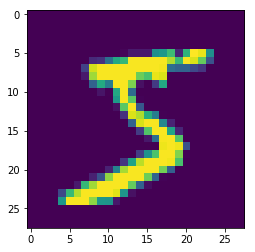

In [33]:
import matplotlib.pyplot as plt
import numpy as np


img = x_train[0]
label = t_train[0]
print(label) # 첫 이미지는 숫자 5입니다.
print(img.shape) # load_mnist는 각 이미지를 1차원 배열로 불러옵니다. 

img = img.reshape(28,28) # 이를 28x28 크기의 2차원 배열로 변환합니다.
plt.imshow(img)
plt.show()

## (참고) 딕셔너리 자료형

```mnist.py```에서는 데이터를 딕셔너리(dictionary) 형식으로 자료를 저장합니다.

딕셔너리 자료형은 숫자 인덱스 뿐만 아니라 문자 인덱스를 사용하여 여러가지 자료 구조를 한번에 저장할 수 있습니다.

In [11]:
a = {1:'a', 2:'b'}
print(a[1])
b = {'a':1, 'b':2}
print(b['a'])

a
1


딕셔너리 자료는 'key'값으로 구분된 'value'를 저장합니다. 

'key'와 'value'의 순서쌍을 'item'이라 합니다. 

참고로 각 'key'는 모두 달라야 합니다. (사전에 같은 단어가 두 개 등장하면 안되는 것처럼)

In [12]:
A = { 'Mike' : 'A+', 
    'Jane' : 'C-',
    'Alice' : 'B0' }
print(A.keys())
print(A.values())
print(A.items())

grade = A.get('Mike') # 'Mike'라는 이름으로 저장된 값을 불러오기
print(grade)

dict_keys(['Mike', 'Jane', 'Alice'])
dict_values(['A+', 'C-', 'B0'])
dict_items([('Mike', 'A+'), ('Jane', 'C-'), ('Alice', 'B0')])
A+


## (참고) pickle 모듈

파이선의 리스트나 딕셔너리와 같은 변수를 저장하기 위해서 **pickle** 모듈을 사용합니다.

이와 관련된 함수는 _pickle_ 라이브러리에 저장되어 있습니다. 

pickle로 저장된 파일의 확장자는 ```.pkl```입니다.

데이터를 pickle 모듈로 저장하기 위해서는 ```pickle.dump```함수를 사용합니다.

pickle 파일로부터 데이터를 불러오기 위해서는 ```pickle.load```함수를 사용합니다.

위에서 정의한 딕셔너리 변수 ```A```를 pickle 형식으로 저장해 봅시다.

In [13]:
import pickle
with open('./data/test.pkl', 'wb') as f: # "test.pkl"을 쓰기전용(w), 바이트 형식(b)으로 엽니다.
    pickle.dump(A, f)

이를 다시 ```pickle.load```를 사용해서 불러올 수 있습니다.

In [15]:
with open('./data/test.pkl', 'rb') as f:
    B = pickle.load(f)
B.items()

dict_items([('Mike', 'A+'), ('Jane', 'C-'), ('Alice', 'B0')])

# 신경망 예제

이미 만들어진 가중치 행렬로부터 MNIST데이터셋을 분류하고 정확도를 계산해 봅시다. 여기서는 `dataset/`폴더 내의 자료 `sample_weight.pkl`를 이용합니다.

In [36]:
with open("dataset/sample_weight.pkl", "rb") as f:
    network = pickle.load(f)

print(network.keys())

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])


In [37]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True, one_hot_label=False)
    return x_test, t_test

def init_network():
    with open("dataset/sample_weight.pkl", "rb") as f:
        network = pickle.load(f)
    return network

def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    B1, B2, B3 = network['b1'], network['b2'], network['b3']
    
    A1 = np.dot(x, W1) + B1
    Z1 = sigmoid(A1)
    A2 = np.dot(Z1, W2) + B2
    Z2 = sigmoid(A2)
    A3 = np.dot(Z2, W3) + B3
    Y = softmax(A3)
    
    return Y

In [39]:
x, t = get_data()
network = init_network()

print(network.keys())

accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt += 1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

dict_keys(['b2', 'W1', 'b1', 'W2', 'W3', 'b3'])
Accuracy:0.9352


In [44]:
print(x.shape)
print(x[0].shape)
W1, W2, W3 = network['W1'], network['W2'], network['W3']
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


테스트 데이터의 총 갯수는 1만개이고, 각 데이터는 784개의 요소, 즉 784차원 벡터로 구성되어 있습니다. (참고로 28x28= 734입니다.) 첫번째 가중치 행렬은 784행 50열로 구성되어 있습니다. 즉, 1층 뉴런의 갯수는 총 50개입니다. 두번째 가중치 행렬은 50행 100열입니다. 즉, 2층 뉴런의 갯수는 100개 입니다. 마지막 세번째 가중치 행렬은 100행 10열 입니다. 즉, 마지막 출력 뉴런의 갯수는 10개입니다. 이 중에서 가장 큰 값을 가진 뉴런이 (확률적으로) 정답이 됩니다.